<a href="https://colab.research.google.com/github/mdsa1348/Html_Css_Fontend-Design/blob/main/DriveDataCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import gdown
import zipfile

# URL to the zip file
zip_url = 'https://drive.google.com/uc?id=1EhVLI4Shkow65f5QN5o0j4_73L8UYQxn'

# Download the zip file
gdown.download(zip_url, '/content/archive.zip', quiet=False)

# Unzip the folder
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cats_dogs')


Downloading...
From (original): https://drive.google.com/uc?id=1EhVLI4Shkow65f5QN5o0j4_73L8UYQxn
From (redirected): https://drive.google.com/uc?id=1EhVLI4Shkow65f5QN5o0j4_73L8UYQxn&confirm=t&uuid=57072d6b-4747-4c52-b9c4-e10b4417fe97
To: /content/archive.zip
100%|██████████| 1.14G/1.14G [00:17<00:00, 63.8MB/s]


In [4]:
import os
train_cats_dir = '/content/cats_dogs/train/cats'
train_dogs_dir = '/content/cats_dogs/train/dogs'
test_cats_dir = '/content/cats_dogs/test/cats'
test_dogs_dir = '/content/cats_dogs/test/dogs'

num_train_cats = len(os.listdir(train_cats_dir))
num_train_dogs = len(os.listdir(train_dogs_dir))
num_test_cats = len(os.listdir(test_cats_dir))
num_test_dogs = len(os.listdir(test_dogs_dir))

print(f'Number of training cat images: {num_train_cats}')
print(f'Number of training dog images: {num_train_dogs}')
print(f'Number of testing cat images: {num_test_cats}')
print(f'Number of testing dog images: {num_test_dogs}')


Number of training cat images: 10000
Number of training dog images: 10000
Number of testing cat images: 2500
Number of testing dog images: 2500


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [6]:
train_dir = '/content/cats_dogs/train'
test_dir = '/content/cats_dogs/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/20
100/100 [==============================] - 14s 65ms/step - loss: 0.7325 - accuracy: 0.5230 - val_loss: 0.6973 - val_accuracy: 0.5020
Epoch 2/20
100/100 [==============================] - 7s 68ms/step - loss: 0.6847 - accuracy: 0.5600 - val_loss: 0.6798 - val_accuracy: 0.6090
Epoch 3/20
100/100 [==============================] - 6s 62ms/step - loss: 0.6746 - accuracy: 0.5935 - val_loss: 0.6765 - val_accuracy: 0.5780
Epoch 4/20
100/100 [==============================] - 6s 60ms/step - loss: 0.6691 - accuracy: 0.6150 - val_loss: 0.6538 - val_accuracy: 0.6450
Epoch 5/20
100/100 [==============================] - 5s 53ms/step - loss: 0.6531 - accuracy: 0.6255 - val_loss: 0.6522 - val_accuracy: 0.6270
Epoch 6/20
100/100 [==============================] - 6s 62ms/step - loss: 0.6345 - accuracy: 0.6405 - val_loss: 0.6296 - val_accuracy: 0.6610
Epoch 7/20
100/100 [==============================] - 6s 63ms/step - loss: 0.6056 - accuracy: 0.6850 - val_loss: 0.6262 - val_accuracy: 0.674

Final Training Accuracy: 0.7785
Final Validation Accuracy: 0.7730
Final Training Loss: 0.4894
Final Validation Loss: 0.4661


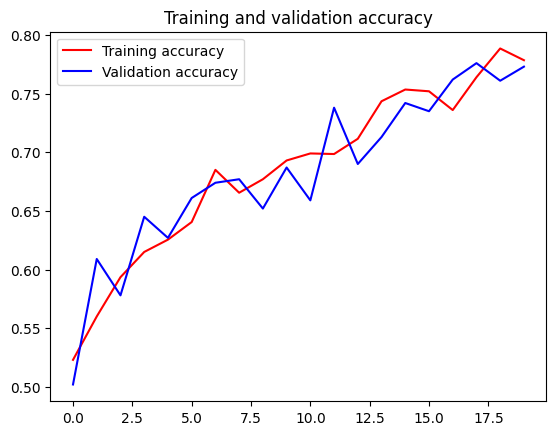

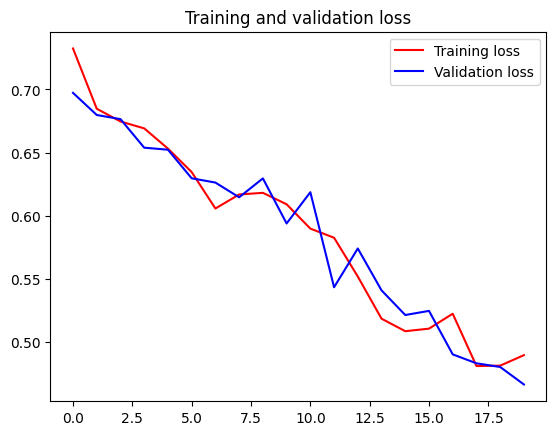

In [11]:
# Get the final values for accuracy, validation accuracy, loss, and validation loss
final_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss: {final_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [10]:
model.save('cats_dogs_cnn_model.h5')



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#to see and test the model

In [12]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('cats_dogs_cnn_model.h5')


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(150, 150))
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image (rescale)
    img_array /= 255.0
    return img_array


In [21]:
def classify_image(img_path):
    # Preprocess the image
    img_array = load_and_preprocess_image(img_path)
    # Predict the class
    prediction = model.predict(img_array)
    # Output the result
    if prediction[0] > 0.5:
        print(f"The image at {img_path} is predicted to be a Dog with a probability of {prediction[0][0]:.4f}")
    else:
        print(f"The image at {img_path} is predicted to be a Cat with a probability of {1 - prediction[0][0]:.4f}")


In [24]:

# Path to your image file
image_path = '/content/download.jpeg'

# Call the function to classify the image
classify_image(image_path)


1/1 [==============================] - 0s 323ms/step
The image at /content/download.jpeg is predicted to be a Cat with a probability of 0.9980
